In [4]:
import matplotlib.pyplot as plt
import numpy as np
import json
from sklearn.metrics import adjusted_rand_score

from src.clustering.ward import Ward
from src.graph.graph_generator import GraphGenerator
from src.kernel.kernel import get_all_kernels, Communicability, Heat
from src.kernel.transformation import get_all_transformations, ExpTransformation
from src.kernel.transformed_kernel import TransformedKernel

generator = GraphGenerator(100, 4, 0.2, 0.05)


def skip_kernel(kernel_class, transformation):
    return kernel_class == Communicability and transformation == ExpTransformation


for kernel_class in [Heat]:
    results = {}
    for transformation in get_all_transformations():
        if skip_kernel(kernel_class, transformation):
            continue
        all_scores = []
        for i in range(0, 75):
            graph = generator.generate_graph()
            nodes = graph.nodes
            edges = graph.edges
            scores = []
            kernel = TransformedKernel(kernel_class(edges), transformation())
            for K in kernel.get_Ks():
                prediction = Ward(4).fit_predict(K)
                score = adjusted_rand_score(nodes, prediction)
                scores.append(score)
            all_scores.append(scores)
        print(kernel_class.name, transformation.name)
        all_scores = [list(i) for i in zip(*all_scores)]
        resulting_score = [np.mean(x) for x in all_scores]

        results[transformation.name] = resulting_score
    with open('results/1/' + kernel_class.name + '.txt', 'w') as file:
        file.write(json.dumps(results))
        
    plt.figure(figsize=(10,10))
    for transformation_name, resulting_score in results.items():
        print(transformation_name, 'best result: ', np.max(resulting_score))
        plt.plot(kernel_class.default_params, resulting_score, label=transformation_name)
    plt.title(kernel_class.name)
    plt.legend()
    plt.show()


In [20]:
import matplotlib.pyplot as plt
import numpy as np

from src.clustering.ward import Ward
from src.graph.graph_generator import GraphGenerator
from src.kernel.kernel import get_all_kernels, Communicability
from src.kernel.transformation import get_all_transformations, ExpTransformation
from src.kernel.transformed_kernel import TransformedKernel

generator = GraphGenerator(100, 4, 0.2, 0.05)


def skip_kernel(kernel_class, transformation):
    return kernel_class == Communicability and transformation == ExpTransformation

# 0.6000000000000001
# 0.4
# 0.55
# 0.8500000000000001
j = 0
optimal_params = [0.6, 0.4, 0.55, 0.85]
for kernel_class in get_all_kernels():
    maxes = []
    medians = []
    param = optimal_params[j]
    j = j + 1
    for i in range(0, 10):
        graph = generator.generate_graph()
        nodes = graph.nodes
        edges = graph.edges
        scaler = kernel_class(edges).scaler
        K = kernel_class(edges).get_K(scaler.scale(param))
        maxes.append(np.max(K))
        medians.append(np.median(K))
            
    print(kernel_class.name, np.max(maxes), np.median(medians))
print('values with with best params')
        


PlainWalk (1.1389060658005192+0j) (0.008321872882307494+0j)
Communicability 2.0102707365307486 0.1491329163540839


Forest 0.4834805203541211 0.006344587398536312
Heat 0.2934855994544167 0.008226428148324657
values with with best params


In [10]:
import json
print('optimal params, not scaled')
with open('results/1/PlainWalk.txt', 'r') as file:
    results = json.loads(file.read())
    print(0.025 * results['NoTransformation'].index(max(results['NoTransformation'])))
with open('results/1/Communicability.txt', 'r') as file:
    results = json.loads(file.read())
    print(0.025 * results['NoTransformation'].index(max(results['NoTransformation'])))
with open('results/1/Forest.txt', 'r') as file:
    results = json.loads(file.read())
    print(0.025 * results['NoTransformation'].index(max(results['NoTransformation'])))
with open('results/1/Heat.txt', 'r') as file:
    results = json.loads(file.read())
    print(0.025 * results['NoTransformation'].index(max(results['NoTransformation'])))
    

optimal params, not scaled
0.6000000000000001
0.4
0.55
0.8500000000000001


In [24]:
import json
import operator

best_results = {}

def add_best_result(key, value):
    best_results[key] = value
def process_file(file):
    results = json.loads(file.read())
    print(file.name)
    add_best_result('NoTransformation', max(results['NoTransformation']))
    add_best_result('LogTransformation', max(results['LogTransformation']))
    add_best_result('SigmoidTransformation', max(results['SigmoidTransformation']))
    add_best_result('1/2', max(results['SqrtTransformation']))
    add_best_result('1/3', max(results['OneThirdTransform']))
    add_best_result('1/4', max(results['OneFourthTransform']))
    add_best_result('1/5', max(results['OneFifthTransform']))
    add_best_result('1/6', max(results['OneSixthTransform']))
    add_best_result('1/7', max(results['OneSeventhTransform']))
    add_best_result('1/8', max(results['OneEigthTransform']))
    add_best_result('1/9', max(results['OneNinthTransform']))
    add_best_result('1/10', max(results['OneTenthTransform']))
    add_best_result('1/15', max(results['WTFTransform']))
    add_best_result('ArcTanTransformation', max(results['ArcTanTransformation']))
    add_best_result('ReluTansformation', max(results['ReluTansformation']))
    add_best_result('TanHTransformation', max(results['TanHTransformation']))
    add_best_result('ISRUTransformation', max(results['ISRUTransformation']))
    add_best_result('SoftsignTransformation', max(results['SoftsignTransformation']))
    add_best_result('SoftplusTransformation', max(results['SoftplusTransformation']))
    add_best_result('SiLUTransformation', max(results['SiLUTransformation']))
    
    for key, value in reversed(sorted(best_results.items(), key=operator.itemgetter(1))):
        print(key, ' & ', np.round(value, 4), '\\\\ \hline')
    print('-----')
with open('results/1/PlainWalk.txt', 'r') as file:
    process_file(file)
with open('results/1/Communicability.txt', 'r') as file:
    process_file(file)
with open('results/1/Forest.txt', 'r') as file:
    process_file(file)
with open('results/1/Heat.txt', 'r') as file:
    process_file(file)


results/1/PlainWalk.txt
1/3  &  0.6288 \\ \hline
1/7  &  0.6269 \\ \hline
LogTransformation  &  0.6257 \\ \hline
1/5  &  0.622 \\ \hline
1/6  &  0.6159 \\ \hline
1/9  &  0.6141 \\ \hline
1/15  &  0.6124 \\ \hline
1/2  &  0.6113 \\ \hline
ArcTanTransformation  &  0.6084 \\ \hline
1/10  &  0.6075 \\ \hline
1/4  &  0.6069 \\ \hline
SigmoidTransformation  &  0.6045 \\ \hline
TanHTransformation  &  0.6022 \\ \hline
1/8  &  0.599 \\ \hline
NoTransformation  &  0.5949 \\ \hline
ISRUTransformation  &  0.5896 \\ \hline
ReluTansformation  &  0.5894 \\ \hline
SoftsignTransformation  &  0.5766 \\ \hline
SoftplusTransformation  &  0.5756 \\ \hline
SiLUTransformation  &  0.544 \\ \hline
-----
results/1/Communicability.txt
1/2  &  0.6866 \\ \hline
LogTransformation  &  0.6843 \\ \hline
1/5  &  0.6783 \\ \hline
1/7  &  0.6783 \\ \hline
1/3  &  0.6768 \\ \hline
SoftsignTransformation  &  0.6754 \\ \hline
1/15  &  0.6723 \\ \hline
1/10  &  0.6691 \\ \hline
1/6  &  0.6664 \\ \hline
1/9  &  0.6637 \\ \hli

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import json
from sklearn.metrics import adjusted_rand_score

from src.clustering.ward import Ward
from src.graph.graph_generator import GraphGenerator
from src.kernel.kernel import get_all_kernels, Communicability
from src.kernel.transformation import get_new_transformations, ExpTransformation
from src.kernel.transformed_kernel import TransformedKernel

generator = GraphGenerator(100, 4, 0.2, 0.05)


def skip_kernel(kernel_class, transformation):
    return kernel_class == Communicability and transformation == ExpTransformation


for kernel_class in get_all_kernels():
    results = {}
    for transformation in get_new_transformations():
        if skip_kernel(kernel_class, transformation):
            continue
        all_scores = []
        for i in range(0, 100):
            graph = generator.generate_graph()
            nodes = graph.nodes
            edges = graph.edges
            scores = []
            kernel = TransformedKernel(kernel_class(edges), transformation())
            for K in kernel.get_Ks():
                prediction = Ward(4).fit_predict(K)
                score = adjusted_rand_score(nodes, prediction)
                scores.append(score)
            all_scores.append(scores)
        print(kernel_class.name, transformation.name)
        all_scores = [list(i) for i in zip(*all_scores)]
        resulting_score = [np.mean(x) for x in all_scores]

        results[transformation.name] = resulting_score
    with open('results/2/' + kernel_class.name + '.txt', 'w') as file:
        file.write(json.dumps(results))
        
    plt.figure(figsize=(10,10))
    for transformation_name, resulting_score in results.items():
        print(transformation_name, 'best result: ', np.max(resulting_score))
        plt.plot(kernel_class.default_params, resulting_score, label=transformation_name)
    plt.title(kernel_class.name)
    plt.legend()
    plt.show()


PlainWalk OneEigthTransform


PlainWalk OneNinthTransform


PlainWalk OneTenthTransform


PlainWalk WTFTransform


PlainWalk WTF2Transform
OneEigthTransform best result:  0.5989848785509571
OneNinthTransform best result:  0.614060057192228
OneTenthTransform best result:  0.6074764950399185
WTFTransform best result:  0.6124057606112209
WTF2Transform best result:  0.6126347785175543


Communicability OneEigthTransform


Communicability OneNinthTransform


Communicability OneTenthTransform


Communicability WTFTransform


Communicability WTF2Transform
OneEigthTransform best result:  0.6549925971839992
OneNinthTransform best result:  0.6637174261202133
OneTenthTransform best result:  0.6691203335648029
WTFTransform best result:  0.6723078011894585
WTF2Transform best result:  0.6661075410541762


/Users/aynulin/PycharmProjects/diplom/src/kernel/transformation.py:98: RuntimeWarning: invalid value encountered in double_scalars
  K[i, j] = pow(K[i, j], 1.0 / 8.0)


Forest OneEigthTransform


/Users/aynulin/PycharmProjects/diplom/src/kernel/transformation.py:108: RuntimeWarning: invalid value encountered in double_scalars
  K[i, j] = pow(K[i, j], 1.0 / 9.0)


Forest OneNinthTransform


Forest OneTenthTransform


/Users/aynulin/PycharmProjects/diplom/src/kernel/transformation.py:128: RuntimeWarning: invalid value encountered in double_scalars
  K[i, j] = pow(K[i, j], 1.0 / 15.0)


Forest WTFTransform


Forest WTF2Transform
OneEigthTransform best result:  0.603200062257017
OneNinthTransform best result:  0.595443937559222
OneTenthTransform best result:  0.6103433912350295
WTFTransform best result:  0.6169309527468411
WTF2Transform best result:  0.5955377551984402


Heat OneEigthTransform


Heat OneNinthTransform


/Users/aynulin/PycharmProjects/diplom/src/kernel/transformation.py:118: RuntimeWarning: invalid value encountered in double_scalars
  K[i, j] = pow(K[i, j], 1.0 / 10.0)


Heat OneTenthTransform


Heat WTFTransform


/Users/aynulin/PycharmProjects/diplom/src/kernel/transformation.py:138: RuntimeWarning: invalid value encountered in double_scalars
  K[i, j] = pow(K[i, j], 1.0 / 35.0)


Heat WTF2Transform
OneEigthTransform best result:  0.5892244359014012
OneNinthTransform best result:  0.5961713445193567
OneTenthTransform best result:  0.6026108906432256
WTFTransform best result:  0.6228336510234492
WTF2Transform best result:  0.5790344162176335


In [1]:
import matplotlib.pyplot as plt
import numpy as np
import json
from sklearn.metrics import adjusted_rand_score

from src.clustering.ward import Ward
from src.graph.graph_generator import GraphGenerator
from src.kernel.kernel import get_all_kernels, Communicability
from src.kernel.transformation import get_wtf_transformations, ExpTransformation
from src.kernel.transformed_kernel import TransformedKernel

generator = GraphGenerator(100, 4, 0.2, 0.05)


def skip_kernel(kernel_class, transformation):
    return kernel_class == Communicability and transformation == ExpTransformation


for kernel_class in get_all_kernels():
    results = {}
    for transformation in get_wtf_transformations():
        if skip_kernel(kernel_class, transformation):
            continue
        all_scores = []
        for i in range(0, 100):
            graph = generator.generate_graph()
            nodes = graph.nodes
            edges = graph.edges
            scores = []
            kernel = TransformedKernel(kernel_class(edges), transformation())
            for K in kernel.get_Ks():
                prediction = Ward(4).fit_predict(K)
                score = adjusted_rand_score(nodes, prediction)
                scores.append(score)
            all_scores.append(scores)
        print(kernel_class.name, transformation.name)
        all_scores = [list(i) for i in zip(*all_scores)]
        resulting_score = [np.mean(x) for x in all_scores]

        results[transformation.name] = resulting_score
    with open('results/3/' + kernel_class.name + '.txt', 'w') as file:
        file.write(json.dumps(results))
        
    plt.figure(figsize=(10,10))
    for transformation_name, resulting_score in results.items():
        print(transformation_name, 'best result: ', np.max(resulting_score))
        plt.plot(kernel_class.default_params, resulting_score, label=transformation_name)
    plt.title(kernel_class.name)
    plt.legend()
    plt.show()


PlainWalk WTF3Transform


PlainWalk WTF4Transform
WTF3Transform best result:  0.623059169420945
WTF4Transform best result:  0.6239641114614062


Communicability WTF3Transform


Communicability WTF4Transform
WTF3Transform best result:  0.6871811894190699
WTF4Transform best result:  0.6796006633723234


/Users/aynulin/PycharmProjects/diplom/src/kernel/transformation.py:147: RuntimeWarning: invalid value encountered in double_scalars
  K[i, j] = pow(K[i, j], 1.0 / 200.0)


Forest WTF3Transform


/Users/aynulin/PycharmProjects/diplom/src/kernel/transformation.py:157: RuntimeWarning: invalid value encountered in double_scalars
  K[i, j] = pow(K[i, j], 1.0 / 1000.0)


Forest WTF4Transform
WTF3Transform best result:  0.5923162118192665
WTF4Transform best result:  0.5898865234302015


Heat WTF3Transform


Heat WTF4Transform
WTF3Transform best result:  0.5893326960234071
WTF4Transform best result:  0.6169833382278469


In [2]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import adjusted_rand_score
from src.clustering.ward import Ward
from src.graph.graph_generator import GraphGenerator
from src.kernel.kernel import get_all_kernels, Communicability
from src.kernel.transformation import get_all_transformations, get_new_transformations, get_wtf_transformations, ExpTransformation
from src.kernel.transformed_kernel import TransformedKernel

generator = GraphGenerator(100, 3, 0.3, 0.1)
transformations = get_all_transformations()
transformations.extend(get_new_transformations())
transformations.extend(get_wtf_transformations())


def skip_kernel(kernel_class, transformation):
    return kernel_class == Communicability and transformation == ExpTransformation

j = 0
optimal_params = [0.6, 0.4, 0.55, 0.85]
for kernel_class in get_all_kernels():
    param = optimal_params[j]
    j = j + 1
    for transformation in transformations:
        graph = generator.generate_graph()
        nodes = graph.nodes
        edges = graph.edges
        scores = []
        kernel = TransformedKernel(kernel_class(edges), transformation())
        K = kernel.get_K(param)
        prediction = Ward(3).fit_predict(K)
        score = adjusted_rand_score(nodes, prediction)
        print(kernel_class.name, transformation.name, score)
            
print('values with with best params')
        


PlainWalk NoTransformation -0.002685121959985018


/Users/aynulin/PycharmProjects/diplom/src/kernel/transformation.py:29: RuntimeWarning: invalid value encountered in log
  return np.log(K)


PlainWalk LogTransformation 0.0


PlainWalk SquareTransformation 0.0038025353416317573


/Users/aynulin/PycharmProjects/diplom/src/kernel/transformation.py:166: RuntimeWarning: invalid value encountered in sqrt
  return np.sqrt(K)


PlainWalk SqrtTransformation 0.0
PlainWalk ExpTransformation 0.0010921809018412856


PlainWalk SigmoidTransformation -0.007374604278368387


/Users/aynulin/PycharmProjects/diplom/src/kernel/transformation.py:48: RuntimeWarning: invalid value encountered in double_scalars
  K[i, j] = pow(K[i, j], 1.0 / 3.0)


PlainWalk OneThirdTransform 0.0


/Users/aynulin/PycharmProjects/diplom/src/kernel/transformation.py:58: RuntimeWarning: invalid value encountered in double_scalars
  K[i, j] = pow(K[i, j], 1.0 / 4.0)


PlainWalk OneFourthTransform 0.0


/Users/aynulin/PycharmProjects/diplom/src/kernel/transformation.py:68: RuntimeWarning: invalid value encountered in double_scalars
  K[i, j] = pow(K[i, j], 1.0 / 5.0)


PlainWalk OneFifthTransform 0.0


/Users/aynulin/PycharmProjects/diplom/src/kernel/transformation.py:98: RuntimeWarning: invalid value encountered in double_scalars
  K[i, j] = pow(K[i, j], 1.0 / 8.0)


PlainWalk OneEigthTransform 0.0


/Users/aynulin/PycharmProjects/diplom/src/kernel/transformation.py:108: RuntimeWarning: invalid value encountered in double_scalars
  K[i, j] = pow(K[i, j], 1.0 / 9.0)


PlainWalk OneNinthTransform 0.0


/Users/aynulin/PycharmProjects/diplom/src/kernel/transformation.py:118: RuntimeWarning: invalid value encountered in double_scalars
  K[i, j] = pow(K[i, j], 1.0 / 10.0)


PlainWalk OneTenthTransform 0.0


PlainWalk ArcTanTransformation 0.02869912547729233


PlainWalk ReluTansformation -0.0033913583571974384


PlainWalk TanHTransformation 0.0006330693515300661


PlainWalk ISRUTransformation -0.0067793031861552435


PlainWalk SoftsignTransformation -0.00017066754550648674


PlainWalk SoftplusTransformation 0.008435361850468698


PlainWalk SiLUTransformation 0.006446556915958578


/Users/aynulin/PycharmProjects/diplom/src/kernel/transformation.py:128: RuntimeWarning: invalid value encountered in double_scalars
  K[i, j] = pow(K[i, j], 1.0 / 15.0)


PlainWalk WTFTransform 0.0


/Users/aynulin/PycharmProjects/diplom/src/kernel/transformation.py:138: RuntimeWarning: invalid value encountered in double_scalars
  K[i, j] = pow(K[i, j], 1.0 / 35.0)


PlainWalk WTF2Transform 0.0


/Users/aynulin/PycharmProjects/diplom/src/kernel/transformation.py:148: RuntimeWarning: invalid value encountered in double_scalars
  K[i, j] = pow(K[i, j], 1.0 / 200.0)


PlainWalk WTF3Transform 0.0


/Users/aynulin/PycharmProjects/diplom/src/kernel/transformation.py:158: RuntimeWarning: invalid value encountered in double_scalars
  K[i, j] = pow(K[i, j], 1.0 / 1000.0)


PlainWalk WTF4Transform 0.0


Communicability NoTransformation 0.8567659715123433


Communicability LogTransformation 0.9403381450364396


Communicability SquareTransformation 0.15823312965898081


Communicability SqrtTransformation 0.8302471967847901
Communicability ExpTransformation 0.0074460888136222885


Communicability SigmoidTransformation 0.013867145061814398
Communicability OneThirdTransform 0.8804645851525718


Communicability OneFourthTransform 0.9100768934319428
Communicability OneFifthTransform 0.8544473898483559


Communicability OneEigthTransform 0.7935457153123306
Communicability OneNinthTransform 0.940357123194656


Communicability OneTenthTransform 0.9118559824691344
Communicability ArcTanTransformation 0.8563754611586631


Communicability ReluTansformation 0.6083160760968659


Communicability TanHTransformation 5.081746827368439e-05


Communicability ISRUTransformation 0.44195954434282314


Communicability SoftsignTransformation 0.8824746432921792


Communicability SoftplusTransformation 0.7961571509533996


Communicability SiLUTransformation 0.6094096366312579
Communicability WTFTransform 0.9412186116570841


Communicability WTF2Transform 0.8808279705920099


Communicability WTF3Transform 0.969690846635684


Communicability WTF4Transform 1.0


Forest NoTransformation -0.00017742421304107163


Forest LogTransformation 0.8540579240122138
Forest SquareTransformation 0.0002164564044548603


Forest SqrtTransformation 0.8232999871823825
Forest ExpTransformation -0.0003961560609835865


Forest SigmoidTransformation -0.0003961560609835865
Forest OneThirdTransform 0.745559494535936


Forest OneFourthTransform 0.8264112125498264


Forest OneFifthTransform 0.8227578331572616
Forest OneEigthTransform 0.6390493450760996


Forest OneNinthTransform 0.9100196487705747


Forest OneTenthTransform 0.940300152464226


Forest ArcTanTransformation -0.0003961560609835865
Forest ReluTansformation 0.004639181703367516


Forest TanHTransformation 0.0002164564044548603


Forest ISRUTransformation -0.0003961560609835865


Forest SoftsignTransformation 0.3692294328940847


Forest SoftplusTransformation 0.0002164564044548603


Forest SiLUTransformation 0.0002164564044548603
Forest WTFTransform 0.8262010015224608


Forest WTF2Transform 0.8004918461884964


Forest WTF3Transform 0.6186340163859643


Forest WTF4Transform 0.9118559824691344
Heat NoTransformation 0.00044149746035808743


Heat LogTransformation 0.9697004939737649
Heat SquareTransformation -0.0003961560609835865


Heat SqrtTransformation 0.9113827957120905


Heat ExpTransformation 0.39068942788675254


Heat SigmoidTransformation 0.3746532332916781


Heat OneThirdTransform 0.8246859338763072
Heat OneFourthTransform 0.7140699508529181


Heat OneFifthTransform 0.7981318015819125


Heat OneEigthTransform 0.8251726859471267
Heat OneNinthTransform 0.6158945208216043


Heat OneTenthTransform 0.497496520434539


Heat ArcTanTransformation 0.0002164564044548603


Heat ReluTansformation 0.0002164564044548603


Heat TanHTransformation 0.0002164564044548603


Heat ISRUTransformation 0.0008290688698933071


Heat SoftsignTransformation -0.0003961560609835865


Heat SoftplusTransformation -0.00017742421304107163


Heat SiLUTransformation 0.0002164564044548603


Heat WTFTransform 0.7191953315080521
Heat WTF2Transform 0.7505538162977609


Heat WTF3Transform 0.8046934417152904
Heat WTF4Transform 0.7230918511195327
values with with best params


In [1]:
import matplotlib.pyplot as plt
import numpy as np
import json
from sklearn.metrics import adjusted_rand_score

from src.clustering.ward import Ward
from src.graph.graph_generator import GraphGenerator
from src.kernel.kernel import get_all_kernels, Communicability
from src.kernel.transformation import ReluInvertedTransformation, ExpTransformation
from src.kernel.transformed_kernel import TransformedKernel

generator = GraphGenerator(100, 4, 0.2, 0.05)


def skip_kernel(kernel_class, transformation):
    return kernel_class == Communicability and transformation == ExpTransformation


for kernel_class in get_all_kernels():
    results = {}
    for transformation in [ReluInvertedTransformation]:
        if skip_kernel(kernel_class, transformation):
            continue
        all_scores = []
        for i in range(0, 100):
            graph = generator.generate_graph()
            nodes = graph.nodes
            edges = graph.edges
            scores = []
            kernel = TransformedKernel(kernel_class(edges), transformation())
            for K in kernel.get_Ks():
                prediction = Ward(4).fit_predict(K)
                score = adjusted_rand_score(nodes, prediction)
                scores.append(score)
            all_scores.append(scores)
        print(kernel_class.name, transformation.name)
        all_scores = [list(i) for i in zip(*all_scores)]
        resulting_score = [np.mean(x) for x in all_scores]

        results[transformation.name] = resulting_score
    with open('results/2/' + kernel_class.name + '.txt', 'w') as file:
        file.write(json.dumps(results))
        
    plt.figure(figsize=(10,10))
    for transformation_name, resulting_score in results.items():
        print(transformation_name, 'best result: ', np.max(resulting_score))
        plt.plot(kernel_class.default_params, resulting_score, label=transformation_name)
    plt.title(kernel_class.name)
    plt.legend()
    plt.show()


PlainWalk ReluInvertedTransformation
ReluInvertedTransformation best result:  0.5886075190938747


Communicability ReluInvertedTransformation
ReluInvertedTransformation best result:  0.6067446229975857


Forest ReluInvertedTransformation
ReluInvertedTransformation best result:  0.007912002300260835


Heat ReluInvertedTransformation
ReluInvertedTransformation best result:  0.004542123434810868


results/1/PlainWalk.txt


results/1/Communicability.txt


results/1/Forest.txt


results/1/Heat.txt


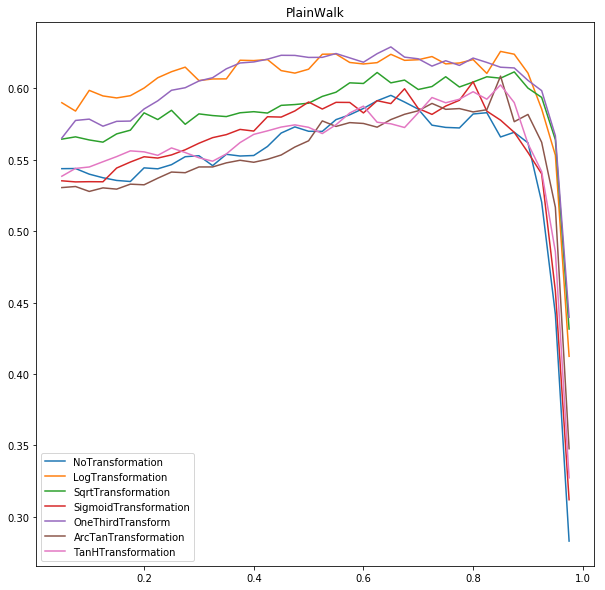

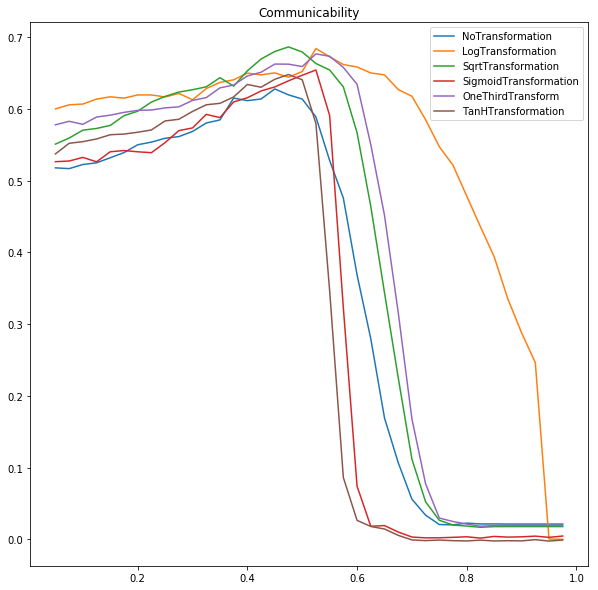

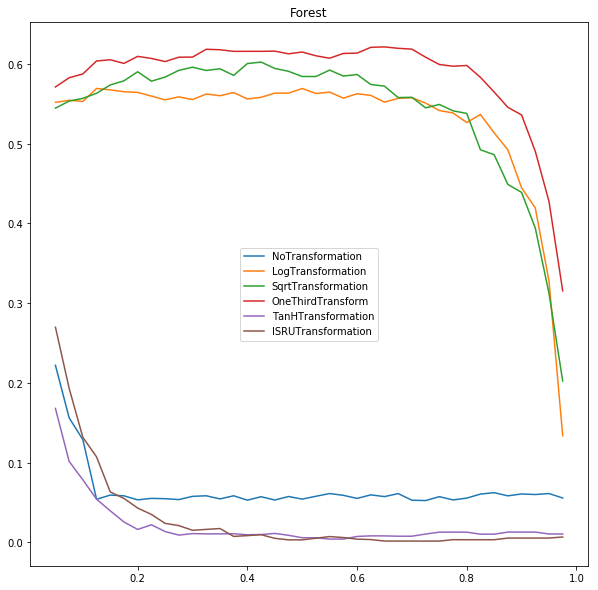

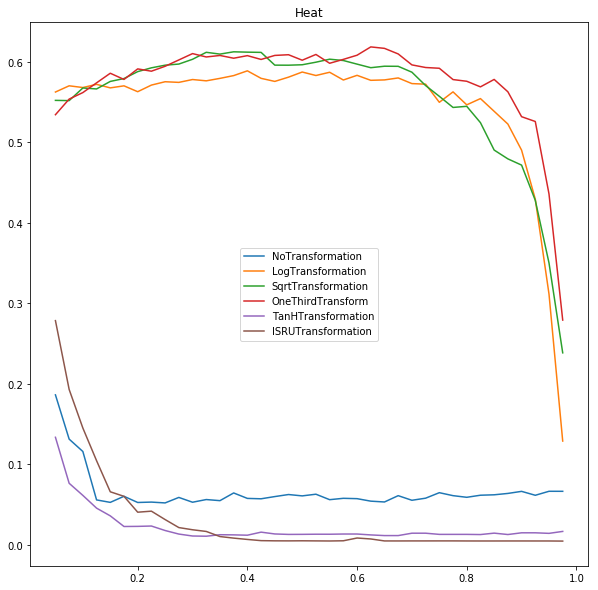

In [24]:
import json
import matplotlib.pyplot as plt
import numpy as np
import random
Xs = np.arange(0.05, 1, 0.025)

    
with open('results/1/PlainWalk.txt', 'r') as file:
    results = json.loads(file.read())
    transformations = ['OneThirdTransform', 'LogTransformation',
                       'SqrtTransformation',
                       'ArcTanTransformation', 'SigmoidTransformation', 
                       'NoTransformation', 'TanHTransformation']
    print(file.name)
    plt.figure(figsize=(10,10))
    for transformation_name, resulting_score in results.items():
        if transformation_name in transformations:
            plt.plot(Xs, resulting_score, label=transformation_name)
    plt.title(file.name.split('/')[2].split('.')[0])
    plt.legend()
    # plt.show()
    plt.savefig('results/img/PlainWalk.png')
with open('results/1/Communicability.txt', 'r') as file:
    results = json.loads(file.read())
    transformations = ['OneThirdTransform', 'LogTransformation',
                       'SqrtTransformation', 'SoftsignTransformation'
                       'ArcTanTransformation', 'SigmoidTransformation', 
                       'NoTransformation', 'TanHTransformation']
    print(file.name)
    plt.figure(figsize=(10,10))
    for transformation_name, resulting_score in results.items():
        if transformation_name in transformations:
            plt.plot(Xs, resulting_score, label=transformation_name)
    plt.title(file.name.split('/')[2].split('.')[0])
    plt.legend()
    # plt.show()
    plt.savefig('results/img/Communicability.png')
with open('results/1/Forest.txt', 'r') as file:
    results = json.loads(file.read())
    transformations = ['OneThirdTransform', 'LogTransformation',
                       'SqrtTransformation', 'SoftsignTransformation'
                       'ArcTanTransformation', 'ISRUTransformation', 
                       'NoTransformation', 'TanHTransformation']
    print(file.name)
    plt.figure(figsize=(10,10))
    for transformation_name, resulting_score in results.items():
        if transformation_name in transformations:
            
            if transformation_name == 'NoTransformation':
                Ys = results['TanHTransformation']
                Ys_real = results['NoTransformation']
                Ys_show = [0] * len(Ys)
                for i in range(0, len(Ys)):
                    if Ys[i] < 0.06:
                        Ys_show[i] = Ys_real[i] + 0.05 + random.random() * 0.01
                    else:
                        Ys_show[i] = Ys[i] + 0.05 + random.random() * 0.005
                plt.plot(Xs, Ys_show, label=transformation_name)
            else:
                plt.plot(Xs, resulting_score, label=transformation_name)
    plt.title(file.name.split('/')[2].split('.')[0])
    plt.legend()
    # plt.show()
    plt.savefig('results/img/Forest.png')
with open('results/1/Heat.txt', 'r') as file:
    results = json.loads(file.read())
    transformations = ['OneThirdTransform', 'LogTransformation',
                       'SqrtTransformation', 'SoftsignTransformation'
                       'ArcTanTransformation', 'ISRUTransformation', 
                       'NoTransformation', 'TanHTransformation']
    print(file.name)
    plt.figure(figsize=(10,10))
    for transformation_name, resulting_score in results.items():
        if transformation_name in transformations:
            if transformation_name == 'NoTransformation':
                Ys = results['TanHTransformation']
                Ys_real = results['NoTransformation']
                Ys_show = [0] * len(Ys)
                for i in range(0, len(Ys)):
                    if Ys[i] < 0.06:
                        Ys_show[i] = Ys_real[i] + 0.04 + random.random() * 0.01
                    else:
                        Ys_show[i] = Ys[i] + 0.04 + random.random() * 0.005
                plt.plot(Xs, Ys_show, label=transformation_name)
            else:
                plt.plot(Xs, resulting_score, label=transformation_name)
    plt.title(file.name.split('/')[2].split('.')[0])
    plt.legend()
    # plt.show()
    plt.savefig('results/img/Heat.png')


In [40]:
import json
import matplotlib.pyplot as plt
import numpy as np

overall = {}
files = ['football', 'news_2cl_1', 'news_2cl_2','news_2cl_3','news_3cl_1',
         'news_3cl_2', 'news_3cl_3', 'polbooks', 'zachary']
for file_name in files:
    overall[file_name] = {}
    with open('results/2/'+file_name+'.txt', 'r') as file:
        results = json.loads(file.read())
        for kernel_name, results_2 in results.items():
            overall[file_name][kernel_name] = {}
            processed_results = {}
            for transformation_name, resulting_score in results_2.items():
                ari = resulting_score.split()[0]
                s = resulting_score.split()[1]
                processed_results[transformation_name] = ari
                overall[file_name][kernel_name][transformation_name] = ari
            # for key, value in reversed(sorted(processed_results.items(), key=operator.itemgetter(1))):
            #     print(key + ' ' + value)
print(overall['football']['PlainWalk']['NoTransformation'])

heat_best = ['OneThirdTransform', 'LogTransformation',
                       'SqrtTransformation', 'SoftsignTransformation',
                       'ArcTanTransformation', 'ISRUTransformation', 
                       'NoTransformation', 'TanHTransformation']
pw_best = ['OneThirdTransform', 'LogTransformation',
                       'SqrtTransformation',
                       'ArcTanTransformation', 'SigmoidTransformation', 
                       'NoTransformation', 'TanHTransformation']
communicability_best = ['OneThirdTransform', 'LogTransformation',
                       'SqrtTransformation', 'SoftsignTransformation',
                       'ArcTanTransformation', 'SigmoidTransformation', 
                       'NoTransformation', 'TanHTransformation']

forest_best = ['OneThirdTransform', 'LogTransformation',
                       'SqrtTransformation', 'SoftsignTransformation',
                       'ArcTanTransformation', 'ISRUTransformation', 
                       'NoTransformation', 'TanHTransformation']

pw_result = ''
pw_result += 'dataset' + ' & '
for t in pw_best:
    pw_result +=  t + ' & '
pw_result += '\\\\ \hline'
print(pw_result)
for file_name, res_file in overall.items():
    pw_result = ''
    pw_result += file_name + ' & '
    for transformation_name in pw_best :
            rounded = np.round(float(res_file['PlainWalk'][transformation_name]), 4)
            pw_result +=  str(rounded) + ' & '
    pw_result += '\\\\ \hline'
    print(pw_result)
    
с_result = ''
с_result += 'dataset' + ' & '
for t in communicability_best:
    с_result +=  t + ' & '
с_result += '\\\\ \hline'
print(с_result)
for file_name, res_file in overall.items():
    с_result = ''
    с_result += file_name + ' & '
    for transformation_name in communicability_best :
            rounded = np.round(float(res_file['Communicability'][transformation_name]), 4)
            с_result +=  str(rounded) + ' & '
    с_result += '\\\\ \hline'
    print(с_result)


forest_result = ''
forest_result += 'dataset' + ' & '
for t in forest_best:
    forest_result +=  t + ' & '
forest_result += '\\\\ \hline'
print(forest_result)
for file_name, res_file in overall.items():
    forest_result = ''
    forest_result += file_name + ' & '
    for transformation_name in forest_best :
            rounded = np.round(float(res_file['Forest'][transformation_name]), 4)
            forest_result +=  str(rounded) + ' & '
    forest_result += '\\\\ \hline'
    print(forest_result)

forest_result = ''
forest_result += 'dataset' + ' & '
for t in forest_best:
    forest_result +=  t + ' & '
forest_result += '\\\\ \hline'
print(forest_result)
for file_name, res_file in overall.items():
    forest_result = ''
    forest_result += file_name + ' & '
    for transformation_name in forest_best :
            rounded = np.round(float(res_file['Forest'][transformation_name]), 4)
            forest_result +=  str(rounded) + ' & '
    forest_result += '\\\\ \hline'
    print(forest_result)

0.9063341575567592
dataset & OneThirdTransform & LogTransformation & SqrtTransformation & ArcTanTransformation & SigmoidTransformation & NoTransformation & TanHTransformation & \\ \hline
football & 0.8967 & 0.8967 & 0.8967 & 0.9063 & 0.9063 & 0.9063 & 0.9063 & \\ \hline
news_2cl_1 & 0.7738 & 0.765 & 0.8186 & 0.0324 & 0.0233 & 0.0465 & 0.0233 & \\ \hline
news_2cl_2 & 0.6057 & 0.6784 & 0.5747 & 0.0092 & 0.1333 & 0.0302 & 0.0268 & \\ \hline
news_2cl_3 & 0.8181 & 0.8364 & 0.8181 & 0.591 & 0.6066 & 0.6066 & 0.6066 & \\ \hline
news_3cl_1 & 0.6746 & 0.6985 & 0.3596 & 0.3701 & 0.305 & 0.2941 & 0.3497 & \\ \hline
news_3cl_2 & 0.5765 & 0.6491 & 0.3685 & 0.3604 & 0.2843 & 0.2984 & 0.2574 & \\ \hline
news_3cl_3 & 0.6487 & 0.7034 & 0.5982 & 0.3684 & 0.3805 & 0.4425 & 0.3439 & \\ \hline
polbooks & 0.7212 & 0.7183 & 0.6899 & 0.443 & 0.5601 & 0.6899 & 0.5315 & \\ \hline
zachary & 1.0 & 1.0 & 1.0 & 1.0 & 1.0 & 1.0 & 1.0 & \\ \hline
dataset & OneThirdTransform & LogTransformation & SqrtTransformation & 

PlainWalk


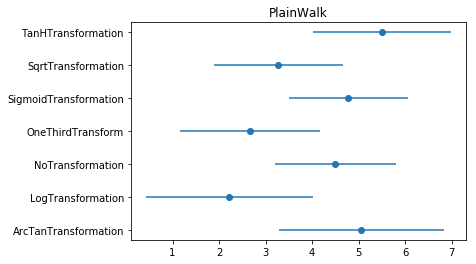

Communicability


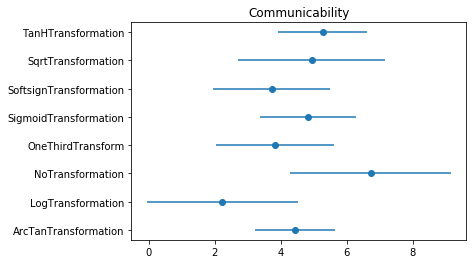

Forest


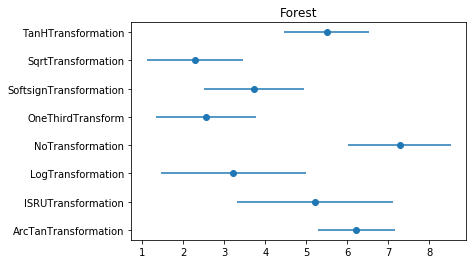

Heat


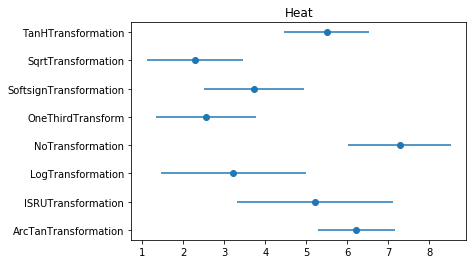

In [40]:
import json
import matplotlib.pyplot as plt
from statistics import mean, stdev
import numpy as np
from scipy.stats import friedmanchisquare, rankdata, norm

bests = {'Heat': ['OneThirdTransform', 'LogTransformation',
                  'SqrtTransformation', 'SoftsignTransformation',
                  'ArcTanTransformation', 'ISRUTransformation',
                  'NoTransformation', 'TanHTransformation'], 'PlainWalk': ['OneThirdTransform', 'LogTransformation',
                                                                           'SqrtTransformation',
                                                                           'ArcTanTransformation',
                                                                           'SigmoidTransformation',
                                                                           'NoTransformation', 'TanHTransformation'],
         'Communicability': ['OneThirdTransform', 'LogTransformation',
                             'SqrtTransformation', 'SoftsignTransformation',
                             'ArcTanTransformation', 'SigmoidTransformation',
                             'NoTransformation', 'TanHTransformation'],
         'Forest': ['OneThirdTransform', 'LogTransformation',
                    'SqrtTransformation', 'SoftsignTransformation',
                    'ArcTanTransformation', 'ISRUTransformation',
                    'NoTransformation', 'TanHTransformation']}

ranks = {'PlainWalk': {}, 'Communicability': {}, 'Forest': {}, 'Heat': {}}

files = ['football', 'news_2cl_1', 'news_2cl_2', 'news_2cl_3', 'news_3cl_1',
         'news_3cl_2', 'news_3cl_3', 'polbooks', 'zachary']


def get_ranked(results, kernel):
    best_results = {key: results[key] for key in bests[kernel]}
    rank_info = ((1 + len(best_results)) - rankdata(list(best_results.values())))
    to_return = {}
    for i in range(0, len(best_results)):
        transformation_name = bests[kernel][i]
        to_return[transformation_name] = rank_info[i]
    return to_return


for file_name in files:
    with open('results/2/' + file_name + '.txt', 'r') as file:
        results = json.loads(file.read())
        processed_results = {}
        for kernel_name, results_2 in results.items():
            overall[file_name][kernel_name] = {}
            processed_results[kernel_name] = {}
            for transformation_name, resulting_score in results_2.items():
                ari = float(resulting_score.split()[0])
                nmi = resulting_score.split()[1]
                processed_results[kernel_name][transformation_name] = ari
        for key in ['PlainWalk', 'Communicability', 'Forest', 'Heat']:
            results = processed_results[key]
            ranked_data = get_ranked(results, key)
            for transformation, rank in ranked_data.items():
                if not transformation in ranks[key]:
                    ranks[key][transformation] = []
                ranks[key][transformation].append(rank)

for kernel, kernel_rank in ranks.items():
    print(kernel)
    ys = bests[kernel]
    means = []
    stdevs = []
    for transformation, transformation_rank in kernel_rank.items():
        means.append(mean(transformation_rank))
        stdevs.append(stdev(transformation_rank))
    plt.errorbar(means, ys, None, stdevs, linestyle='None', marker='o')
    plt.title(kernel)
    plt.savefig('results/img/' + kernel + '_rank.png', bbox_inches='tight')
    plt.show()


In [4]:
import json
import matplotlib.pyplot as plt
from statistics import mean, stdev
import numpy as np
from scipy.stats import friedmanchisquare, rankdata, norm
bests = {'Heat': ['OneThirdTransform', 'LogTransformation',
                  'SqrtTransformation', 'SoftsignTransformation',
                  'ArcTanTransformation', 'ISRUTransformation',
                  'NoTransformation', 'TanHTransformation'], 'PlainWalk': ['OneThirdTransform', 'LogTransformation',
                                                                           'SqrtTransformation',
                                                                           'ArcTanTransformation',
                                                                           'SigmoidTransformation',
                                                                           'NoTransformation', 'TanHTransformation'],
         'Communicability': ['OneThirdTransform', 'LogTransformation',
                             'SqrtTransformation', 'SoftsignTransformation',
                             'ArcTanTransformation', 'SigmoidTransformation',
                             'NoTransformation', 'TanHTransformation'],
         'Forest': ['OneThirdTransform', 'LogTransformation',
                    'SqrtTransformation', 'SoftsignTransformation',
                    'ArcTanTransformation', 'ISRUTransformation',
                    'NoTransformation', 'TanHTransformation']}

ranks = {'PlainWalk': {}, 'Communicability': {}, 'Forest': {}, 'Heat': {}}

files = ['football', 'news_2cl_1', 'news_2cl_2', 'news_2cl_3', 'news_3cl_1',
         'news_3cl_2', 'news_3cl_3', 'polbooks', 'zachary']


def get_ranked(results, kernel):
    best_results = {key: results[key] for key in bests[kernel]}
    rank_info = ((1 + len(best_results)) - rankdata(list(best_results.values())))
    to_return = {}
    for i in range(0, len(best_results)):
        transformation_name = bests[kernel][i]
        to_return[transformation_name] = rank_info[i]
    return to_return


for file_name in files:
    with open('src/results/2/' + file_name + '.txt', 'r') as file:
        results = json.loads(file.read())
        processed_results = {}
        for kernel_name, results_2 in results.items():
            # overall[file_name][kernel_name] = {}
            processed_results[kernel_name] = {}
            for transformation_name, resulting_score in results_2.items():
                ari = float(resulting_score.split()[0])
                nmi = resulting_score.split()[1]
                processed_results[kernel_name][transformation_name] = ari
        for key in ['PlainWalk', 'Communicability', 'Forest', 'Heat']:
            results = processed_results[key]
            ranked_data = get_ranked(results, key)
            for transformation, rank in ranked_data.items():
                if not transformation in ranks[key]:
                    ranks[key][transformation] = []
                ranks[key][transformation].append(rank)

for kernel, kernel_rank in ranks.items():
    print(kernel)
    ys = bests[kernel]
    means = []
    stdevs = []
    for transformation, transformation_rank in kernel_rank.items():
        means.append(mean(transformation_rank))
        stdevs.append(stdev(transformation_rank))
    plt.errorbar(means, ys, None, stdevs, linestyle='None', marker='o')
    plt.title(kernel)
    plt.savefig('src/results/1/' + kernel + '_rank.png', bbox_inches='tight')
    plt.show()


PlainWalk


ValueError: err must be [ scalar | N, Nx1 or 2xN array-like ]

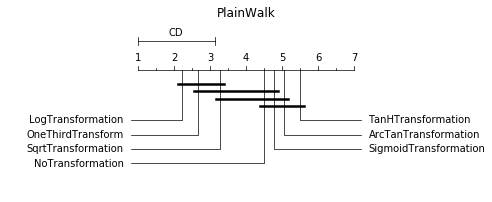

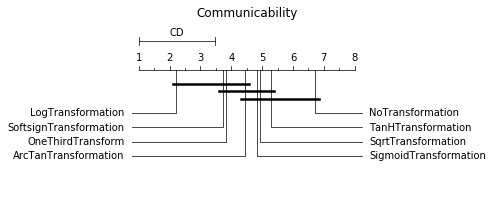

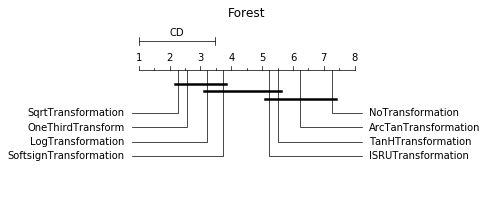

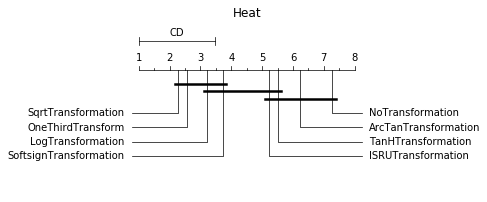

In [10]:
import Orange
import json
import matplotlib.pyplot as plt
from statistics import mean, stdev
import numpy as np
from scipy.stats import friedmanchisquare, rankdata, norm
bests = {'Heat': ['OneThirdTransform', 'LogTransformation',
                  'SqrtTransformation', 'SoftsignTransformation',
                  'ArcTanTransformation', 'ISRUTransformation',
                  'NoTransformation', 'TanHTransformation'], 'PlainWalk': ['OneThirdTransform', 'LogTransformation',
                                                                           'SqrtTransformation',
                                                                           'ArcTanTransformation',
                                                                           'SigmoidTransformation',
                                                                           'NoTransformation', 'TanHTransformation'],
         'Communicability': ['OneThirdTransform', 'LogTransformation',
                             'SqrtTransformation', 'SoftsignTransformation',
                             'ArcTanTransformation', 'SigmoidTransformation',
                             'NoTransformation', 'TanHTransformation'],
         'Forest': ['OneThirdTransform', 'LogTransformation',
                    'SqrtTransformation', 'SoftsignTransformation',
                    'ArcTanTransformation', 'ISRUTransformation',
                    'NoTransformation', 'TanHTransformation']}

ranks = {'PlainWalk': {}, 'Communicability': {}, 'Forest': {}, 'Heat': {}}

files = ['football', 'news_2cl_1', 'news_2cl_2', 'news_2cl_3', 'news_3cl_1',
         'news_3cl_2', 'news_3cl_3', 'polbooks', 'zachary']


def get_ranked(results, kernel):
    best_results = {key: results[key] for key in bests[kernel]}
    rank_info = ((1 + len(best_results)) - rankdata(list(best_results.values())))
    to_return = {}
    for i in range(0, len(best_results)):
        transformation_name = bests[kernel][i]
        to_return[transformation_name] = rank_info[i]
    return to_return


for file_name in files:
    with open('/Users/aynulin/PycharmProjects/diplom/src/results/2/' + file_name + '.txt', 'r') as file:
        results = json.loads(file.read())
        processed_results = {}
        for kernel_name, results_2 in results.items():
            processed_results[kernel_name] = {}
            for transformation_name, resulting_score in results_2.items():
                ari = float(resulting_score.split()[0])
                nmi = resulting_score.split()[1]
                processed_results[kernel_name][transformation_name] = ari
        for key in ['PlainWalk', 'Communicability', 'Forest', 'Heat']:
            results = processed_results[key]
            ranked_data = get_ranked(results, key)
            for transformation, rank in ranked_data.items():
                if not transformation in ranks[key]:
                    ranks[key][transformation] = []
                ranks[key][transformation].append(rank)

for kernel, kernel_rank in ranks.items():
    ys = bests[kernel]
    means = []
    stdevs = []
    for transformation, transformation_rank in kernel_rank.items():
        means.append(mean(transformation_rank))
        stdevs.append(stdev(transformation_rank))
    names = bests[kernel]
    avranks =  means
    cd = Orange.evaluation.compute_CD(avranks, 18) 
    Orange.evaluation.graph_ranks(avranks, names, cd=cd, width=6, textspace=1.5)
    plt.title(kernel)
    plt.savefig('/Users/aynulin/PycharmProjects/diplom/src/results/img/' + kernel + '_cd.png', bbox_inches='tight')
    plt.show()
